In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime

In [2]:
df = pd.read_csv("owid-covid-data.csv")
df['date'] = pd.to_datetime(df['date'],format ="%m/%d/%Y") #Converting to accessible format
df.index=df['date']
#df.drop('date',axis=1,inplace=True)
df.head()

C:\Users\Aashutosh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-03-13,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2020-03-19,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2020-03-20,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2020-03-21,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2020-03-22,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


Text(0.5, 1.0, 'Daily New Cases in Italy')

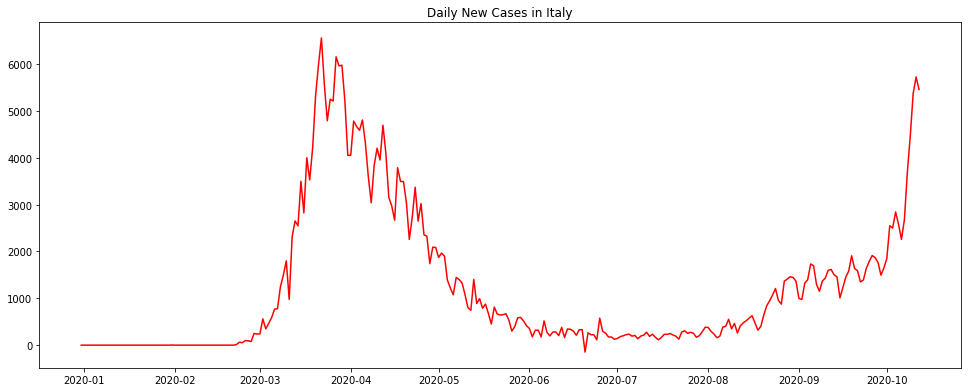

In [3]:
fig = plt.figure(figsize = (16,6))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(df.loc[df['location']=='Italy']['new_cases'],color='red')
axes.set_title('Daily New Cases in Italy')

In [4]:
new_data = pd.DataFrame(df.loc[df['location']=='Italy']['new_cases'])
len(new_data)

287

In [5]:
length = round(len(new_data)*0.85)
length

244

In [6]:
train_df = new_data.iloc[:length]
test_df = new_data.iloc[length:]

In [7]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


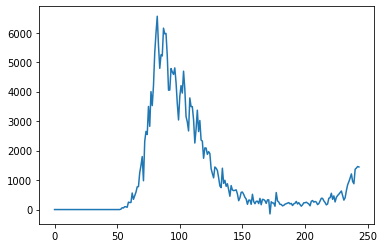

In [8]:
dataset = train_df.values
plt.plot(dataset)

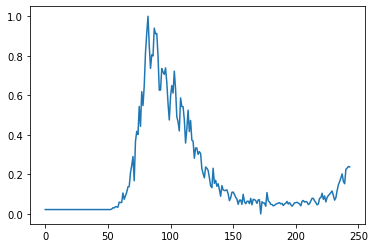

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
plt.plot(scaled_data)

In [10]:
x_train, y_train = [], []
for i in range(30,len(scaled_data)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)) #since LSTM requires 3D input: samples, timesteps, features
x_train.shape

(214, 30, 1)

In [12]:
model = Sequential()
model.add(LSTM(units = 100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate=0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(rate = 0.2))

model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=2, validation_split=0.15)

Instructions for updating:
Use tf.cast instead.
Train on 181 samples, validate on 33 samples
Epoch 1/10
181/181 [==============================] - 11s 59ms/step - loss: 0.0379 - val_loss: 0.0020
Epoch 2/10
181/181 [==============================] - 6s 33ms/step - loss: 0.0314 - val_loss: 0.0012
Epoch 3/10
181/181 [==============================] - 6s 33ms/step - loss: 0.0094 - val_loss: 0.0033
Epoch 4/10
181/181 [==============================] - 6s 34ms/step - loss: 0.0090 - val_loss: 7.6353e-04
Epoch 5/10
181/181 [==============================] - 6s 35ms/step - loss: 0.0080 - val_loss: 0.0046
Epoch 6/10
181/181 [==============================] - 6s 35ms/step - loss: 0.0062 - val_loss: 0.0012
Epoch 7/10
181/181 [==============================] - 7s 37ms/step - loss: 0.0099 - val_loss: 9.1274e-04
Epoch 8/10
181/181 [==============================] - 8s 42ms/step - loss: 0.0061 - val_loss: 0.0011
Epoch 9/10
181/181 [==============================] - 7s 40ms/step - loss: 0.0046 - val_lo

In [14]:
total_dataset = pd.concat((test_df['new_cases'],train_df['new_cases'],),axis=0)
total_dataset = total_dataset.sort_index(ascending=True,axis=0)
total_dataset

date
2019-12-31       0.0
2020-01-01       0.0
2020-01-02       0.0
2020-01-03       0.0
2020-01-04       0.0
               ...  
2020-10-08    3677.0
2020-10-09    4458.0
2020-10-10    5372.0
2020-10-11    5724.0
2020-10-12    5456.0
Name: new_cases, Length: 287, dtype: float64

In [22]:
inputs = total_dataset[len(total_dataset) - len(test_df) - 30:].values 
inputs = inputs.reshape(-1,1) 
inputs  = scaler.transform(inputs)
inputs.shape

(73, 1)

In [32]:
X_test = []
for i in range(30,inputs.shape[0]): 
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)
X_test.shape

(43, 30)

In [31]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_cases = model.predict(X_test)
predicted_cases = scaler.inverse_transform(predicted_cases)
predicted_cases.shape

(43, 1)

In [25]:
predicted_cases

array([[1806.353 ],
       [1867.3558],
       [1878.0585],
       [1822.7893],
       [1712.0144],
       [1575.858 ],
       [1462.707 ],
       [1413.6613],
       [1433.5703],
       [1494.6008],
       [1566.8004],
       [1627.2355],
       [1671.1266],
       [1703.2051],
       [1727.4141],
       [1743.6274],
       [1732.0486],
       [1681.7288],
       [1603.5477],
       [1524.496 ],
       [1485.2876],
       [1507.2017],
       [1587.1553],
       [1693.989 ],
       [1789.2688],
       [1853.0985],
       [1887.4985],
       [1908.3368],
       [1932.386 ],
       [1966.4738],
       [1997.0054],
       [2010.6478],
       [2008.3892],
       [2025.3759],
       [2095.234 ],
       [2246.1155],
       [2468.783 ],
       [2712.8218],
       [2933.0452],
       [3132.9736],
       [3357.6162],
       [3674.0686],
       [4116.6123]], dtype=float32)

In [26]:
test_df['predictions']=predicted_cases

C:\Users\Aashutosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
from sklearn.metrics import mean_squared_error

testScore = np.sqrt(mean_squared_error(test_df['predictions'], test_df['new_cases']))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 640.39 RMSE


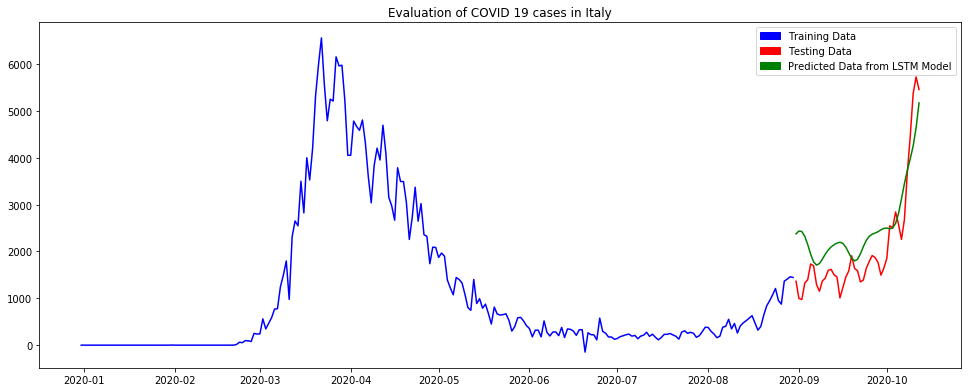

In [88]:
import matplotlib.patches as mpatches
fig= plt.figure(figsize=(16,6))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(train_df['new_cases'],color='blue')
axes.plot(test_df['new_cases'],color='red')
axes.plot(test_df['predictions'],color='green')
axes.set_title('Evaluation of COVID 19 cases in Italy')
legend_dict = { 'Training Data' : 'blue', 'Testing Data' : 'red', 'Predicted Data from LSTM Model' : 'green' }
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
plt.savefig('legend.png', bbox_inches='tight')

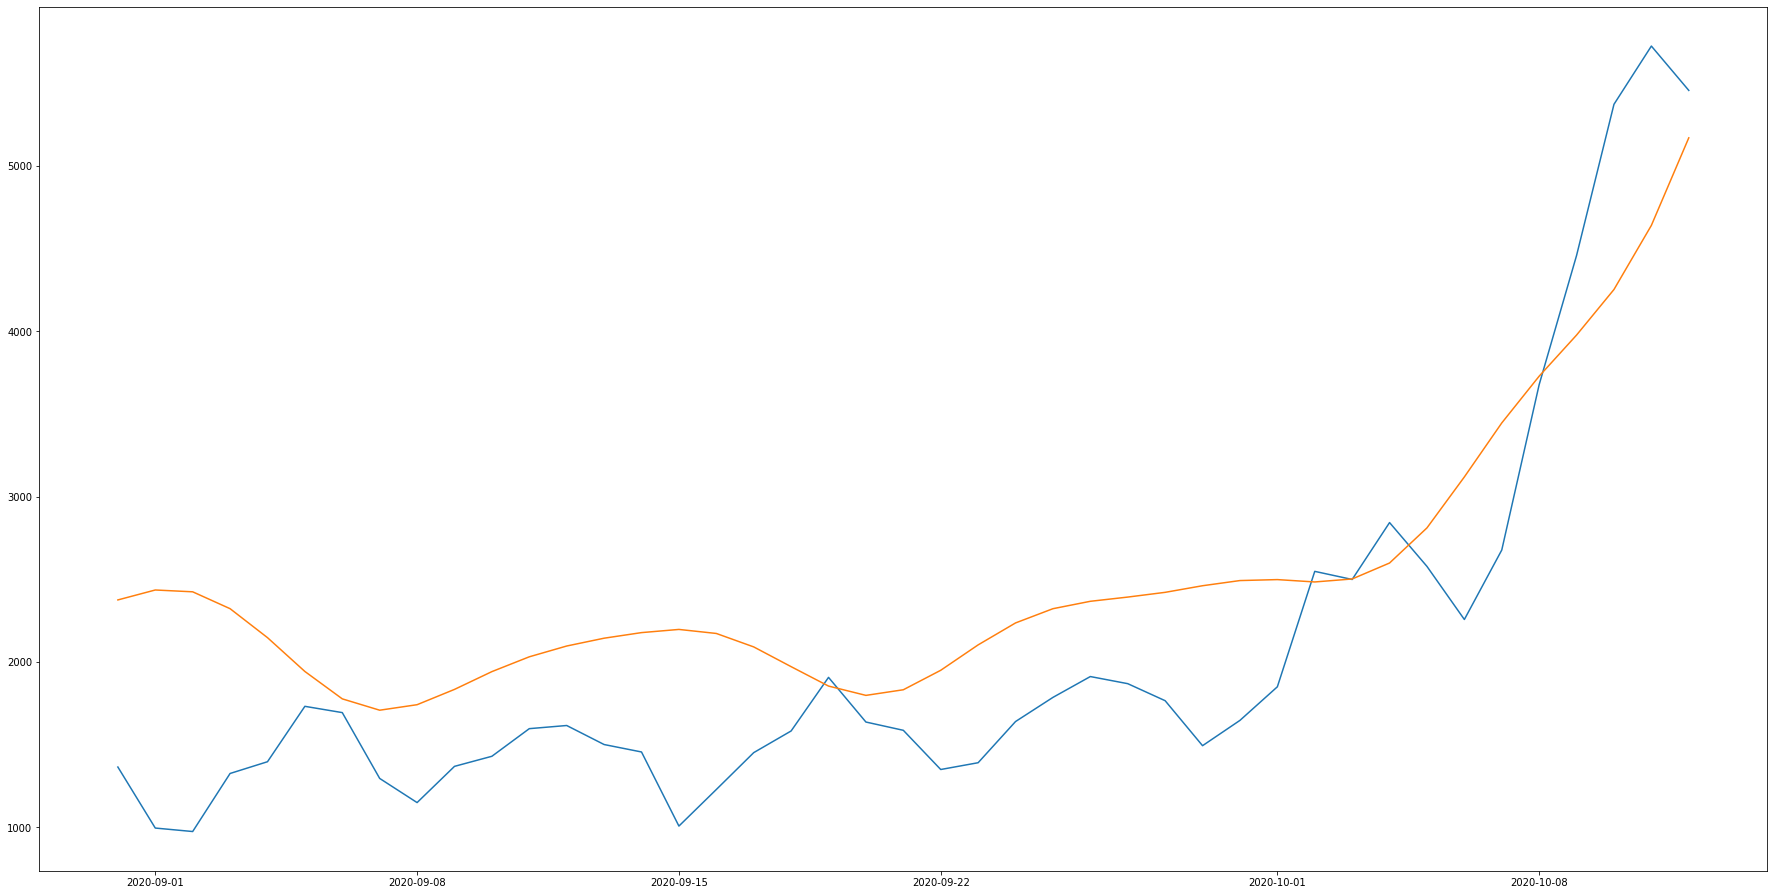

In [91]:
fig= plt.figure(figsize=(30,15))
axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(test_df['new_cases'])
axes.plot(test_df['predictions'])
plt.show()